# posggym-agents policy analysis


## Notation

- **Same-play** refers to pairings of policies that are trained together or at least trained as part of the same population
- **Cross-play** refers to pairings of policies that were not trained together

In [1]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents.plot as plot_utils

from posggym_agents.agents.predatorprey10x10_P4_p3_s3_coop_v0.load import BASE_DIR

# Data Loading

In [2]:
results_filepath = osp.join(BASE_DIR, "results", "pairwise_results.csv")
all_df = plot_utils.import_results(results_filepath)
agent_ids = all_df["agent_id"].unique().tolist()
agent_ids.sort()

def get_policy_seed(row, id_key):
    policy_id = row[id_key]
    policy_id = policy_id.replace("-v0", "")
    tokens = policy_id.split("_")
    seed = 'none'
    for t in tokens:
        if t.startswith("seed"):
            seed = t.replace("seed", "")
            break
    return seed
    
def get_policy_type(row, id_key):
    policy_id = row[id_key]
    policy_id = policy_id.replace("-v0", "")
    tokens = policy_id.split("_")
    alg_tokens = []
    for t in tokens:
        if t.startswith("seed"):
            break
        alg_tokens.append(t)
    policy_type = "_".join(alg_tokens)
    return policy_type

def get_team_id(row):
    pi_ids = [row[f"coplayer_policy_id_{i}"] for i in agent_ids]
    pi_ids.sort()
    return tuple(pi_ids)


all_df["policy_seed"] = all_df.apply(lambda r: get_policy_seed(r, "policy_id"), axis=1)
all_df["policy_type"] = all_df.apply(lambda r: get_policy_type(r, "policy_id"), axis=1)
for i in agent_ids:
    all_df[f"coplayer_policy_seed_{i}"] = all_df.apply(
        lambda r: get_policy_seed(r, f"coplayer_policy_id_{i}"), axis=1
    )
    all_df[f"coplayer_policy_type_{i}"] = all_df.apply(
        lambda r: get_policy_type(r, f"coplayer_policy_id_{i}"), axis=1
    )
all_df["team_id"] = all_df.apply(get_team_id, axis=1)

print("\nColumns")
print("-------")
for c in all_df.columns:
    print(f"  {c}")


Columns
-------
  exp_id
  agent_id
  env_id
  policy_id
  exp_seed
  num_episodes
  time_limit
  episode_return_mean
  episode_return_std
  episode_return_max
  episode_return_min
  episode_steps_mean
  episode_steps_std
  episode_time_mean
  episode_time_std
  num_episode_done
  num_LOSS
  num_DRAW
  num_WIN
  num_NA
  episode_return_CI
  episode_steps_CI
  episode_time_CI
  prop_LOSS
  prop_DRAW
  prop_WIN
  prop_NA
  coplayer_policy_id_0
  coplayer_policy_id_1
  coplayer_policy_id_2
  coplayer_policy_id_3
  policy_seed
  policy_type
  coplayer_policy_seed_0
  coplayer_policy_type_0
  coplayer_policy_seed_1
  coplayer_policy_type_1
  coplayer_policy_seed_2
  coplayer_policy_type_2
  coplayer_policy_seed_3
  coplayer_policy_type_3
  team_id


## The policies

In [3]:
for k in ["agent_id", "policy_seed", "policy_type"]:
    values = all_df[k].unique().tolist()
    values.sort()
    print(f"{k}: {values}")
    
for i in agent_ids:
    for k in ["coplayer_policy_id", "coplayer_policy_seed", "coplayer_policy_type"]:
        k = f"{k}_{i}"
        values = all_df[k].unique().tolist()
        values.sort()
        print(f"{k}: {values}")
    
policy_ids = all_df["policy_id"].unique().tolist()
policy_ids.sort()

print("\nPolicy IDs")
print("----------")
for pi_id in policy_ids:
    print(f"  {pi_id}")
    
team_ids = all_df["team_id"].unique().tolist()
team_ids.sort()
print("\nTeam IDs")
print("--------")
for t_id in team_ids:
    print(f"    {t_id},")

agent_id: [0, 1, 2, 3]
policy_seed: ['0', '1', '2', '3', '4', 'none']
policy_type: ['random', 'sp']
coplayer_policy_id_0: ['random-v0', 'sp_seed0-v0', 'sp_seed1-v0', 'sp_seed2-v0', 'sp_seed3-v0', 'sp_seed4-v0']
coplayer_policy_seed_0: ['0', '1', '2', '3', '4', 'none']
coplayer_policy_type_0: ['random', 'sp']
coplayer_policy_id_1: ['random-v0', 'sp_seed0-v0', 'sp_seed1-v0', 'sp_seed2-v0', 'sp_seed3-v0', 'sp_seed4-v0']
coplayer_policy_seed_1: ['0', '1', '2', '3', '4', 'none']
coplayer_policy_type_1: ['random', 'sp']
coplayer_policy_id_2: ['random-v0', 'sp_seed0-v0', 'sp_seed1-v0', 'sp_seed2-v0', 'sp_seed3-v0', 'sp_seed4-v0']
coplayer_policy_seed_2: ['0', '1', '2', '3', '4', 'none']
coplayer_policy_type_2: ['random', 'sp']
coplayer_policy_id_3: ['random-v0', 'sp_seed0-v0', 'sp_seed1-v0', 'sp_seed2-v0', 'sp_seed3-v0', 'sp_seed4-v0']
coplayer_policy_seed_3: ['0', '1', '2', '3', '4', 'none']
coplayer_policy_type_3: ['random', 'sp']

Policy IDs
----------
  random-v0
  sp_seed0-v0
  sp_seed1-

# The environment

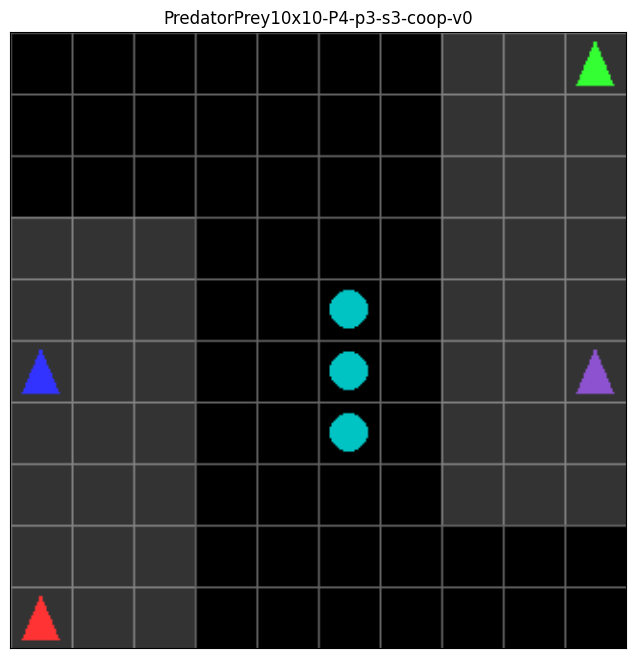

In [4]:
plot_utils.plot_environment(all_df["env_id"].unique()[0])    
plt.show()

## Pairwise Performance

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


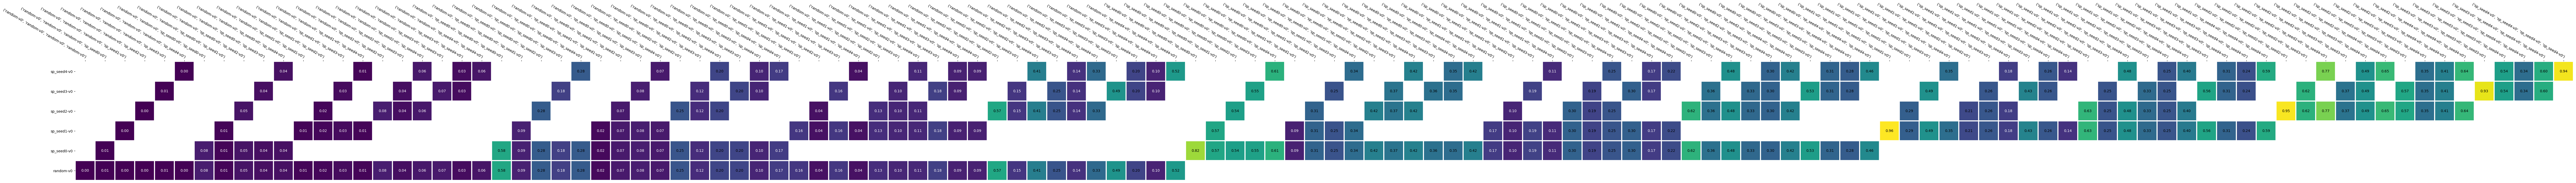

In [7]:
# Pairwise performance by team
plot_utils.plot_pairwise_comparison(
    all_df, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    coplayer_policy_key="team_id",
    vrange=None, 
    figsize=(len(team_ids), len(policy_ids)), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

# For interesting teams

(I.e. teams without the random agent)

In [6]:
teams_of_interest = [t for t in all_df["team_id"].unique() if "random" not in t[0]]
team_df = all_df[all_df["team_id"].isin(teams_of_interest)]

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


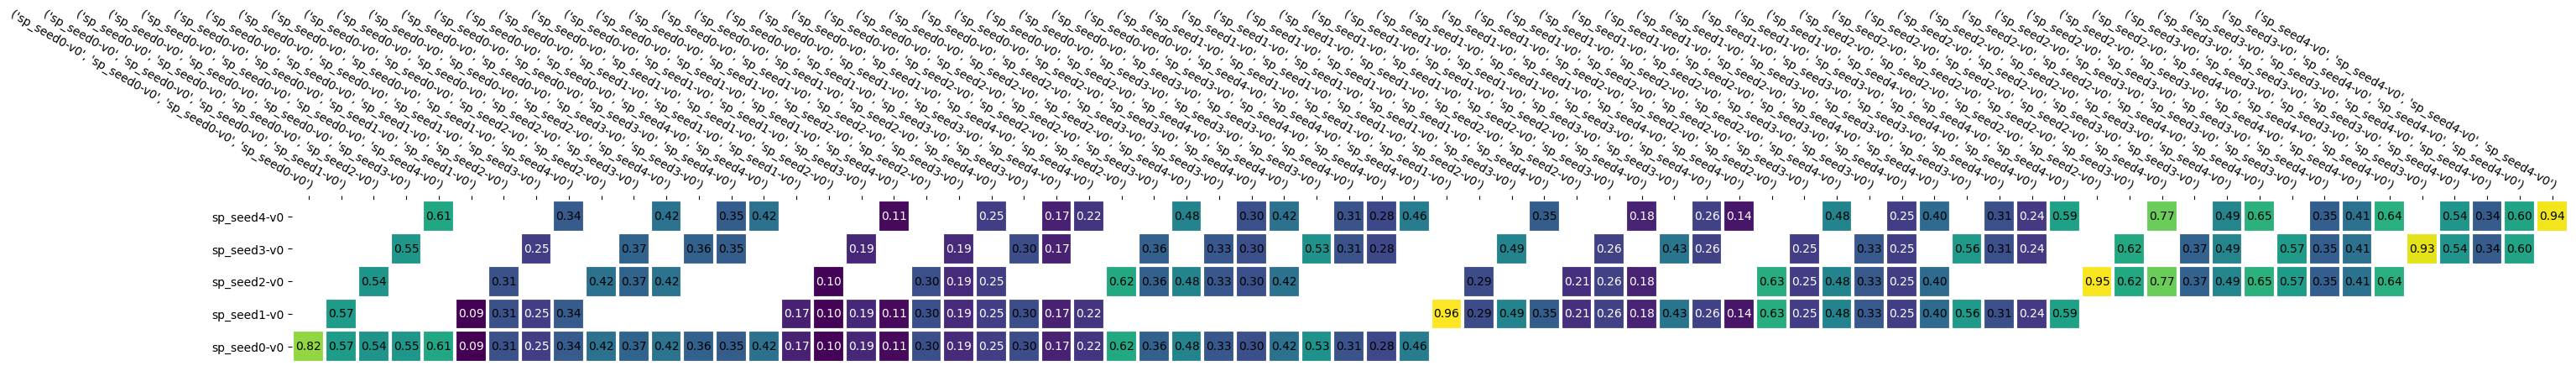

In [11]:
plot_utils.plot_pairwise_comparison(
    team_df, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    coplayer_policy_key="team_id",
    y_err_key=None,
    vrange=None, 
    figsize=(len(teams_of_interest)//2, len(policy_ids)), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)


<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


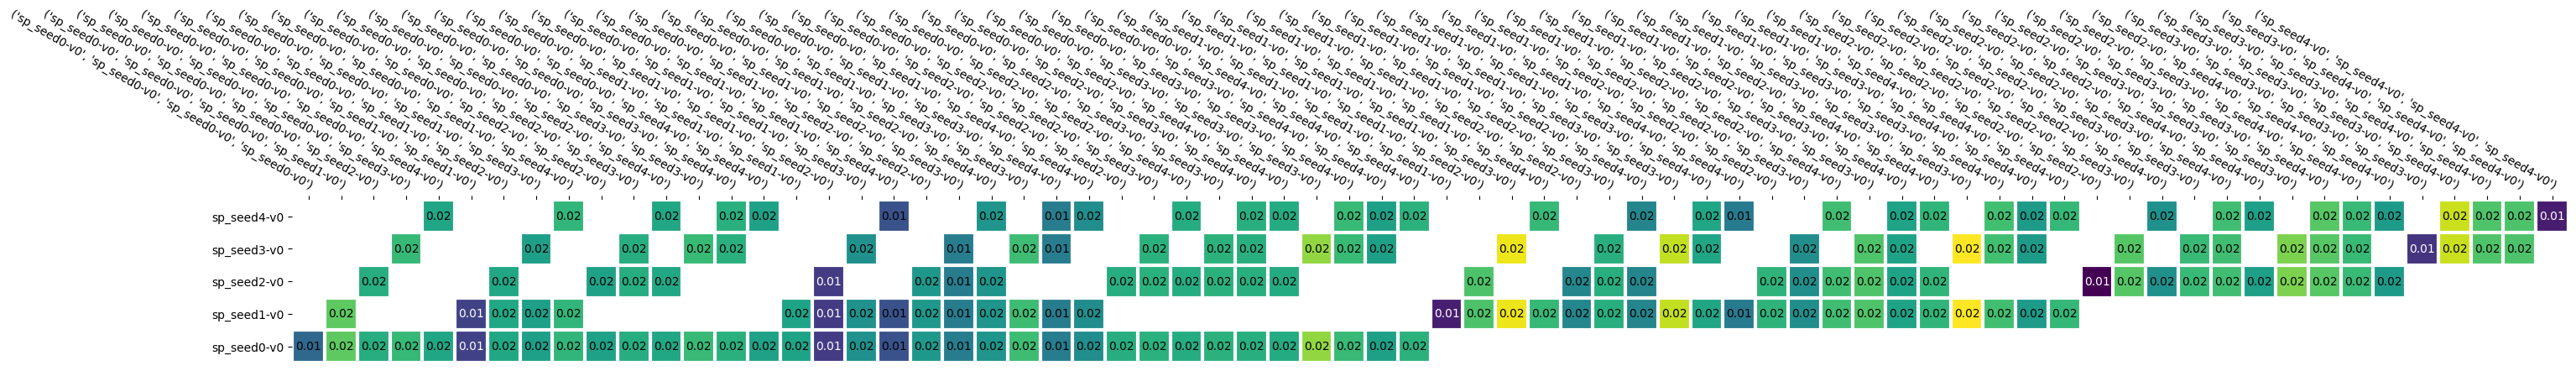

In [12]:
# CI
plot_utils.plot_pairwise_comparison(
    team_df, 
    y_key="episode_return_CI", 
    policy_key="policy_id",
    coplayer_policy_key="team_id",
    y_err_key=None,
    vrange=None, 
    figsize=(len(teams_of_interest)//2, len(policy_ids)), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


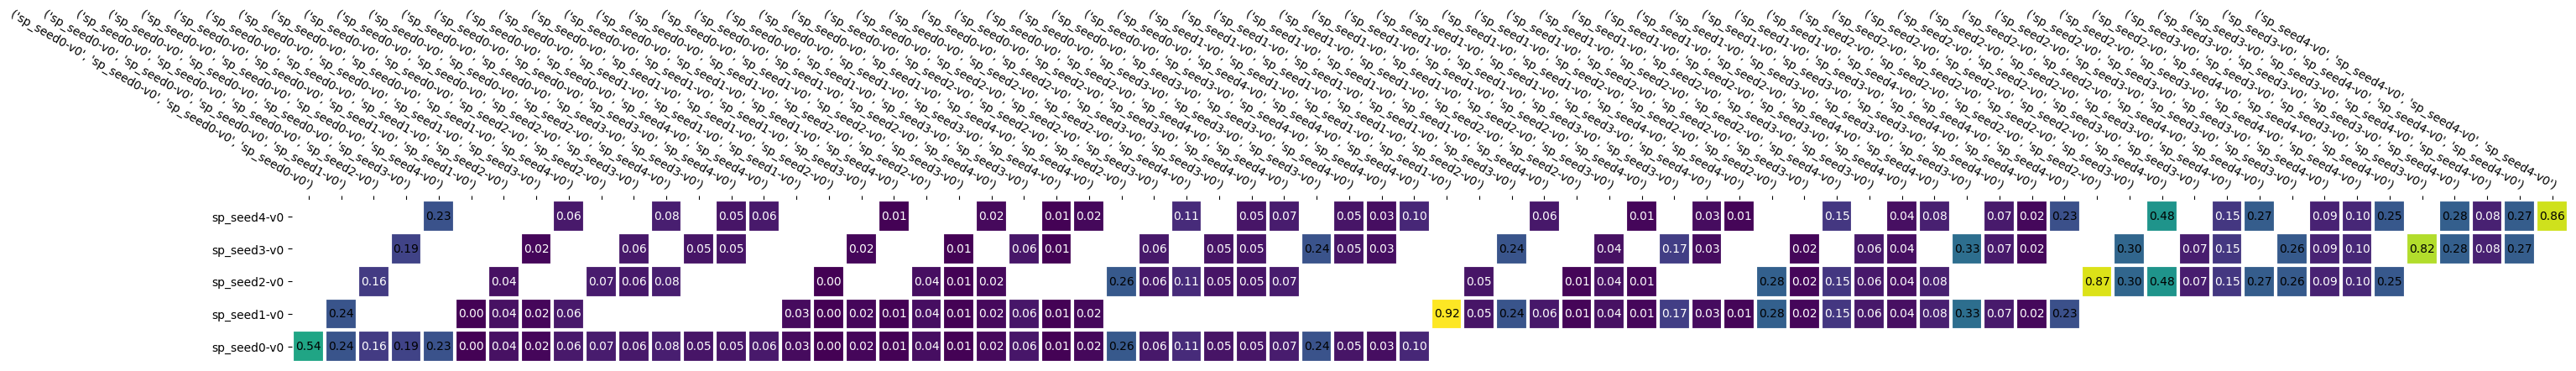

In [13]:
plot_utils.plot_pairwise_comparison(
    team_df, 
    y_key="prop_WIN", 
    policy_key="policy_id",
    coplayer_policy_key="team_id",
    y_err_key=None,
    vrange=None, 
    figsize=(len(teams_of_interest)//2, len(policy_ids)), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

# Same teams

Teams without the random agent, and all agents in the team are the same, except for row agent

In [17]:
same_teams = [
    # seed 0
    ('sp_seed0-v0', 'sp_seed0-v0', 'sp_seed0-v0', 'sp_seed0-v0'),
    ('sp_seed0-v0', 'sp_seed0-v0', 'sp_seed0-v0', 'sp_seed1-v0'),
    ('sp_seed0-v0', 'sp_seed0-v0', 'sp_seed0-v0', 'sp_seed2-v0'),
    ('sp_seed0-v0', 'sp_seed0-v0', 'sp_seed0-v0', 'sp_seed3-v0'),
    ('sp_seed0-v0', 'sp_seed0-v0', 'sp_seed0-v0', 'sp_seed4-v0'),
    # seed 1
    ('sp_seed0-v0', 'sp_seed1-v0', 'sp_seed1-v0', 'sp_seed1-v0'),
    ('sp_seed1-v0', 'sp_seed1-v0', 'sp_seed1-v0', 'sp_seed1-v0'),
    ('sp_seed1-v0', 'sp_seed1-v0', 'sp_seed1-v0', 'sp_seed2-v0'),
    ('sp_seed1-v0', 'sp_seed1-v0', 'sp_seed1-v0', 'sp_seed3-v0'),
    ('sp_seed1-v0', 'sp_seed1-v0', 'sp_seed1-v0', 'sp_seed4-v0'),
    # seed 2
    ('sp_seed0-v0', 'sp_seed2-v0', 'sp_seed2-v0', 'sp_seed2-v0'),
    ('sp_seed1-v0', 'sp_seed2-v0', 'sp_seed2-v0', 'sp_seed2-v0'),
    ('sp_seed2-v0', 'sp_seed2-v0', 'sp_seed2-v0', 'sp_seed2-v0'),
    ('sp_seed2-v0', 'sp_seed2-v0', 'sp_seed2-v0', 'sp_seed3-v0'),
    ('sp_seed2-v0', 'sp_seed2-v0', 'sp_seed2-v0', 'sp_seed4-v0'),
    # seed 3
    ('sp_seed0-v0', 'sp_seed3-v0', 'sp_seed3-v0', 'sp_seed3-v0'),
    ('sp_seed1-v0', 'sp_seed3-v0', 'sp_seed3-v0', 'sp_seed3-v0'),
    ('sp_seed2-v0', 'sp_seed3-v0', 'sp_seed3-v0', 'sp_seed3-v0'),
    ('sp_seed3-v0', 'sp_seed3-v0', 'sp_seed3-v0', 'sp_seed3-v0'),
    ('sp_seed3-v0', 'sp_seed3-v0', 'sp_seed3-v0', 'sp_seed4-v0'),
    # seed 4
    ('sp_seed0-v0', 'sp_seed4-v0', 'sp_seed4-v0', 'sp_seed4-v0'),
    ('sp_seed1-v0', 'sp_seed4-v0', 'sp_seed4-v0', 'sp_seed4-v0'),
    ('sp_seed2-v0', 'sp_seed4-v0', 'sp_seed4-v0', 'sp_seed4-v0'),
    ('sp_seed3-v0', 'sp_seed4-v0', 'sp_seed4-v0', 'sp_seed4-v0'),
    ('sp_seed4-v0', 'sp_seed4-v0', 'sp_seed4-v0', 'sp_seed4-v0'),
]
same_team_df = all_df[all_df["team_id"].isin(same_teams)]

same_team_policy_ids = same_team_df["policy_id"].unique().tolist()
same_team_policy_ids.sort()

<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/home/jonathon/miniconda3/envs/posggym-agents/lib/python3.8/site-packages/matplotlib/colors.py:1211: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


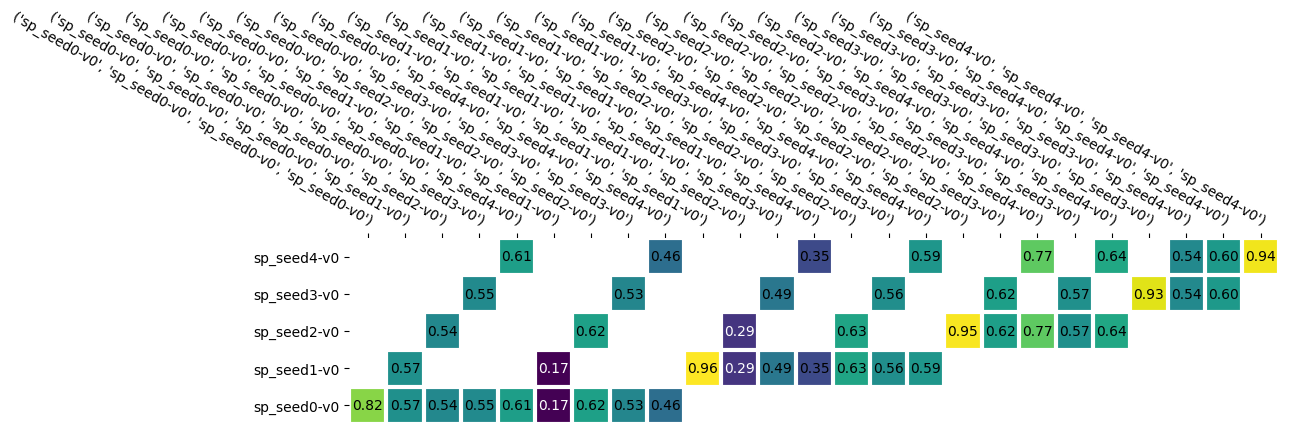

In [18]:
plot_utils.plot_pairwise_comparison(
    same_team_df, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    coplayer_policy_key="team_id",
    y_err_key=None,
    vrange=None, 
    figsize=(len(same_teams)//2, len(same_team_policy_ids)), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)